# Extra Trees Classifier

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("darkgrid")

In [2]:
## Import packages
## tree will be used to plot the decisiton tree
from sklearn import tree

## This is the actual out of the box algorithm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score,accuracy_score

In [3]:
#import cleaned CSV (no date information)
cmm_pa_clf_read = pd.read_csv("../Data/cmm_pa_clf.csv",index_col = 0)

cmm_pa_clf_data = cmm_pa_clf_read.drop(columns = 'pa_approved').copy()
cmm_pa_clf_target = cmm_pa_clf_read['pa_approved'].copy()
X_train,X_test,y_train,y_test= train_test_split(cmm_pa_clf_data, cmm_pa_clf_target, test_size = 0.2, 
                                             random_state = 10475, shuffle = True,
                                            stratify = cmm_pa_clf_target)

#kfold cross validation for roc_auc, accuracy
kfold = StratifiedKFold(5, shuffle=True, random_state=10475)

## Depths analysis

In what follows we find a good max_depth for extra trees classifier.

In [31]:
depth = range(1,11)
estimators = 100
## Store accuracy and roc_auc scores
cv_accs = np.zeros((5, len(depth)))
cv_aucs = np.zeros((5, len(depth)))


i = 0
for train_index, test_index in  kfold.split(X_train, y_train):
    X_train_train = X_train.iloc[train_index]
    X_holdout = X_train.iloc[test_index]
    y_train_train  =  y_train.iloc[train_index]
    y_holdout = y_train.iloc[test_index]
    
    j = 0
    for d in depth: ## Try different depths
        extra_tree = ExtraTreesClassifier(n_estimators=estimators, max_depth=d, random_state=10475)
        extra_tree.fit(X_train_train, y_train_train)
        
        cv_accs[i,j] = accuracy_score(y_holdout, extra_tree.predict(X_holdout))
        cv_aucs[i,j] = roc_auc_score(y_holdout, extra_tree.predict_proba(X_holdout)[:,1])
        
        j = j + 1
    i = i + 1

In [32]:
## This computes the mean of accuracy and roc_auc scores in the cross-validation.
print(np.mean(cv_accs,axis=0))
print(np.mean(cv_aucs,axis=0))

[0.73445229 0.74120874 0.78826558 0.80158063 0.81253035 0.81407276
 0.81409299 0.8138007  0.81372426 0.81372426]
[0.85333088 0.86731827 0.87140782 0.87473888 0.87676869 0.87750485
 0.8778593  0.87807041 0.87808947 0.87808968]


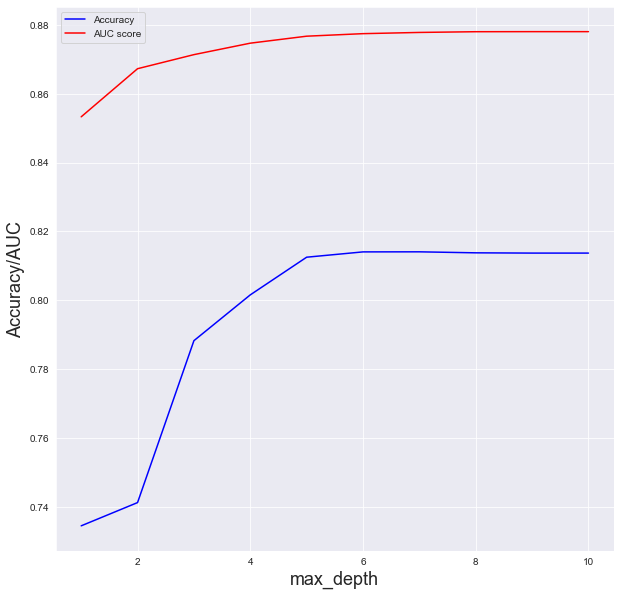

In [33]:
## Average Accuracy and AUC score
acc_mean = cv_accs.mean(0)
auc_mean = cv_aucs.mean(0)

#Plot the Accuracy/AUC vs depth
plt.figure(figsize=(10,10));
plt.plot(depth,acc_mean,'b')
plt.plot(depth,auc_mean,'r')
plt.legend(["Accuracy","AUC score"])
plt.xlabel("max_depth",fontsize=18)
plt.ylabel("Accuracy/AUC",fontsize=18)
plt.show()

## Estimators analysis

We analyze the behavior of extra trees classifier with different number of estimators.

In [23]:
depth = 6
## We will try different number of estimators ranging from 100 to 1000.
estimators = range(1,11)
## Store accuracy and roc_auc scores
cv_accs = np.zeros((5, len(estimators)))
cv_aucs = np.zeros((5, len(estimators)))


i = 0
for train_index, test_index in  kfold.split(X_train, y_train):
    X_train_train = X_train.iloc[train_index]
    X_holdout = X_train.iloc[test_index]
    y_train_train  =  y_train.iloc[train_index]
    y_holdout = y_train.iloc[test_index]
    
    j = 0 
    for estimator in estimators: ## different number of estimators
        extra_tree = ExtraTreesClassifier(n_estimators=estimator*100, max_depth=depth, random_state=10475)
        extra_tree.fit(X_train_train, y_train_train)
        
        cv_accs[i,j] = accuracy_score(y_holdout, extra_tree.predict(X_holdout))
        cv_aucs[i,j] = roc_auc_score(y_holdout, extra_tree.predict_proba(X_holdout)[:,1])
        
        j = j + 1
    i = i + 1

In [24]:
## This computes the mean of accuracy and roc_auc scores in the cross-validation.
print(np.mean(cv_accs,axis=0))
print(np.mean(cv_aucs,axis=0))

[0.81407276 0.81423239 0.81420766 0.81413571 0.8139491  0.81413571
 0.81423239 0.81423239 0.81423239 0.81423239]
[0.87750485 0.87760914 0.87766985 0.87773438 0.87774963 0.87776922
 0.87778006 0.87778193 0.87779335 0.87780499]


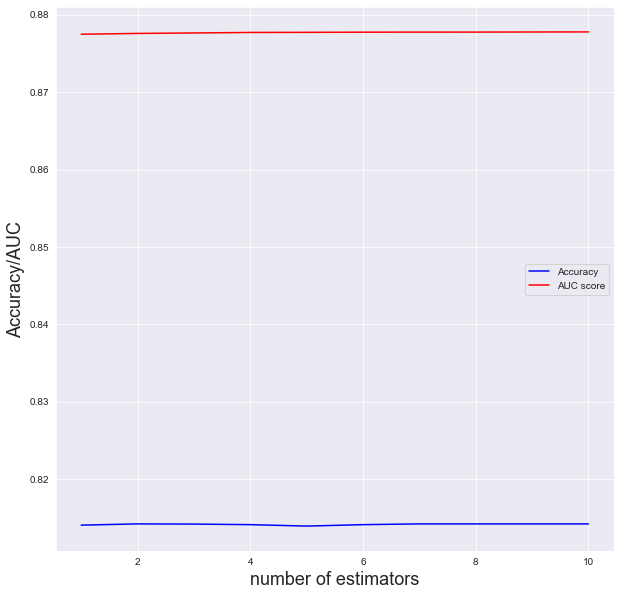

In [29]:
## Average Accuracy and AUC score
acc_mean = cv_accs.mean(0)
auc_mean = cv_aucs.mean(0)

#Plot the Accuracy/AUC vs depth
plt.figure(figsize=(10,10));
plt.plot(estimators,acc_mean,'b')
plt.plot(estimators,auc_mean,'r')
plt.legend(["Accuracy","AUC score"])
plt.xlabel("number of estimators",fontsize=18)
plt.ylabel("Accuracy/AUC",fontsize=18)
plt.show()

## Feature importances

In [36]:
## We fit the extra trees model with number of estimators being 100, and max_depth being 6.
extra_tree=ExtraTreesClassifier(n_estimators=100,max_depth=6,random_state=10475)
fig=extra_tree.fit(X_train, y_train)

In [37]:
## The dataframe storing the feature importances.
score_df = pd.DataFrame({'features': X_train.columns,
                         'feature_importances': extra_tree.feature_importances_})
score_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
8,reject_code_75.0,0.442317
2,contraindication,0.150948
9,reject_code_76.0,0.096482
6,bin_417740,0.056121
4,drug_C,0.055642
1,tried_and_failed,0.052121
3,drug_B,0.051855
7,bin_999001,0.049371
5,bin_417614,0.042353
0,correct_diagnosis,0.002792
